In [34]:
import featuretools as ft
import featuretools.variable_types as vtypes

import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

#import sklearn
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import(
    classification_report, confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error
)


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import (
    StandardScaler, LabelBinarizer, FunctionTransformer,PolynomialFeatures, OrdinalEncoder
)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

from sklearn.feature_selection import (
    VarianceThreshold, SelectKBest, SelectPercentile, 
    SelectFromModel, f_regression, RFECV
)

from sklearn.impute import SimpleImputer
from sklearn_pandas import DataFrameMapper
#, CategoricalImputer
from sklearn.model_selection import GridSearchCV

from sklearn.base import TransformerMixin, BaseEstimator

from sklearn.pipeline import Pipeline, FeatureUnion

In [52]:
from sklearn.preprocessing import OneHotEncoder

# Example 1

https://featuretools.alteryx.com/en/stable/

In [3]:
data = ft.demo.load_mock_customer()

In [8]:
customers_df = data["customers"]
customers_df

,customer_id,zip_code,join_date,date_of_birth
0,1,60091,2011-04-17 10:48:33,1994-07-18
1,2,13244,2012-04-15 23:31:04,1986-08-18
2,3,13244,2011-08-13 15:42:34,2003-11-21
3,4,60091,2011-04-08 20:08:14,2006-08-15
4,5,60091,2010-07-17 05:27:50,1984-07-28


In [10]:
sessions_df = data["sessions"]
sessions_df

,session_id,customer_id,device,session_start
0,1,2,desktop,2014-01-01 00:00:00
1,2,5,mobile,2014-01-01 00:17:20
2,3,4,mobile,2014-01-01 00:28:10
3,4,1,mobile,2014-01-01 00:44:25
4,5,4,mobile,2014-01-01 01:11:30
5,6,1,tablet,2014-01-01 01:23:25
6,7,3,tablet,2014-01-01 01:39:40
7,8,4,tablet,2014-01-01 01:55:55
8,9,1,desktop,2014-01-01 02:15:25
9,10,2,tablet,2014-01-01 02:31:40


In [11]:
transactions_df = data["transactions"]
transactions_df

,transaction_id,session_id,transaction_time,product_id,amount
0,298,1,2014-01-01 00:00:00,5,127.64
1,2,1,2014-01-01 00:01:05,2,109.48
2,308,1,2014-01-01 00:02:10,3,95.06
3,116,1,2014-01-01 00:03:15,4,78.92
4,371,1,2014-01-01 00:04:20,3,31.54
...,...,...,...,...,...
495,112,35,2014-01-01 08:56:15,5,55.42
496,111,35,2014-01-01 08:57:20,3,34.87
497,276,35,2014-01-01 08:58:25,1,10.94
498,266,35,2014-01-01 08:59:30,5,19.86


In [12]:
entities = {"customers" : (customers_df, "customer_id"),
            "sessions" : (sessions_df, "session_id", "session_start"),
            "transactions" : (transactions_df, "transaction_id", "transaction_time")
           }

In [17]:
relationships = [("sessions", "session_id", "transactions", "session_id"),
                 ("customers", "customer_id", "sessions", "customer_id")]

In [18]:
relationships

[('sessions', 'session_id', 'transactions', 'session_id'),
 ('customers', 'customer_id', 'sessions', 'customer_id')]

In [19]:
feature_matrix_customers, features_defs = ft.dfs(entities=entities,
                                                 relationships=relationships,
                                                 target_entity="customers")

In [23]:
pd.set_option('max_columns', None)
feature_matrix_customers

,zip_code,COUNT(sessions),MODE(sessions.device),NUM_UNIQUE(sessions.device),COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),MODE(transactions.product_id),NUM_UNIQUE(transactions.product_id),SKEW(transactions.amount),STD(transactions.amount),SUM(transactions.amount),DAY(date_of_birth),DAY(join_date),MONTH(date_of_birth),MONTH(join_date),WEEKDAY(date_of_birth),WEEKDAY(join_date),YEAR(date_of_birth),YEAR(join_date),MAX(sessions.COUNT(transactions)),MAX(sessions.MEAN(transactions.amount)),MAX(sessions.MIN(transactions.amount)),MAX(sessions.NUM_UNIQUE(transactions.product_id)),MAX(sessions.SKEW(transactions.amount)),MAX(sessions.STD(transactions.amount)),MAX(sessions.SUM(transactions.amount)),MEAN(sessions.COUNT(transactions)),MEAN(sessions.MAX(transactions.amount)),MEAN(sessions.MEAN(transactions.amount)),MEAN(sessions.MIN(transactions.amount)),MEAN(sessions.NUM_UNIQUE(transactions.product_id)),MEAN(sessions.SKEW(transactions.amount)),MEAN(sessions.STD(transactions.amount)),MEAN(sessions.SUM(transactions.amount)),MIN(sessions.COUNT(transactions)),MIN(sessions.MAX(transactions.amount)),MIN(sessions.MEAN(transactions.amount)),MIN(sessions.NUM_UNIQUE(transactions.product_id)),MIN(sessions.SKEW(transactions.amount)),MIN(sessions.STD(transactions.amount)),MIN(sessions.SUM(transactions.amount)),MODE(sessions.DAY(session_start)),MODE(sessions.MODE(transactions.product_id)),MODE(sessions.MONTH(session_start)),MODE(sessions.WEEKDAY(session_start)),MODE(sessions.YEAR(session_start)),NUM_UNIQUE(sessions.DAY(session_start)),NUM_UNIQUE(sessions.MODE(transactions.product_id)),NUM_UNIQUE(sessions.MONTH(session_start)),NUM_UNIQUE(sessions.WEEKDAY(session_start)),NUM_UNIQUE(sessions.YEAR(session_start)),SKEW(sessions.COUNT(transactions)),SKEW(sessions.MAX(transactions.amount)),SKEW(sessions.MEAN(transactions.amount)),SKEW(sessions.MIN(transactions.amount)),SKEW(sessions.NUM_UNIQUE(transactions.product_id)),SKEW(sessions.STD(transactions.amount)),SKEW(sessions.SUM(transactions.amount)),STD(sessions.COUNT(transactions)),STD(sessions.MAX(transactions.amount)),STD(sessions.MEAN(transactions.amount)),STD(sessions.MIN(transactions.amount)),STD(sessions.NUM_UNIQUE(transactions.product_id)),STD(sessions.SKEW(transactions.amount)),STD(sessions.SUM(transactions.amount)),SUM(sessions.MAX(transactions.amount)),SUM(sessions.MEAN(transactions.amount)),SUM(sessions.MIN(transactions.amount)),SUM(sessions.NUM_UNIQUE(transactions.product_id)),SUM(sessions.SKEW(transactions.amount)),SUM(sessions.STD(transactions.amount)),MODE(transactions.sessions.customer_id),MODE(transactions.sessions.device),NUM_UNIQUE(transactions.sessions.customer_id),NUM_UNIQUE(transactions.sessions.device)
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60091,8,mobile,3,126,139.43,71.631905,5.81,4,5,0.019698,40.442059,9025.62,18,17,7,4,0,6,1994,2011,25,88.755625,26.36,5,0.640252,46.905665,1613.93,15.750000,132.246250,72.774140,9.823750,5.000000,-0.059515,39.093244,1128.202500,12,118.90,50.623125,5,-1.038434,30.450261,809.97,1,4,1,2,2014,1,4,1,1,1,1.946018,-0.780493,-0.424949,2.440005,0.000000,-0.312355,0.778170,4.062019,7.322191,13.759314,6.954507,0.000000,0.589386,279.510713,1057.97,582.193117,78.59,40,-0.476122,312.745952,1,mobile,1,3
2,13244,7,desktop,3,93,146.81,77.422366,8.73,4,5,0.098259,37.705178,7200.28,18,15,8,4,0,6,1986,2012,18,96.581000,56.46,5,0.755711,47.935920,1320.64,13.285714,133.090000,78.415122,22.085714,5.000000,-0.039663,36.957218,1028.611429,8,100.04,61.910000,5,-0.763603,27.839228,634.84,1,3,1,2,2014,1,4,1,1,1,-0.303276,-1.539467,0.235296,2.154929,0.000000,0.013087,-0.440929,3.450328,17.221593,11.477071,15.874374,0.000000,0.509798,251.609234,931.63,548.905851,154.60,35,-0.277640,258.700528,2,desktop,1,3
3,13244,6,desktop,3,93,149.15,67.060430,5.89,1,5,0.418230,43.683296,6236.62,21,13,11,8,4,5,2003,2011,18,82.109444,20.06,5,0.854976,50.110120,1477.97,15.500000,141.271667,67.539577,1

In [24]:
feature_matrix_sessions, features_defs = ft.dfs(entities=entities,
                                                relationships=relationships,
                                                target_entity="sessions")

In [25]:
feature_matrix_sessions

,customer_id,device,COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),MODE(transactions.product_id),NUM_UNIQUE(transactions.product_id),SKEW(transactions.amount),STD(transactions.amount),SUM(transactions.amount),DAY(session_start),MONTH(session_start),WEEKDAY(session_start),YEAR(session_start),customers.zip_code,MODE(transactions.DAY(transaction_time)),MODE(transactions.MONTH(transaction_time)),MODE(transactions.WEEKDAY(transaction_time)),MODE(transactions.YEAR(transaction_time)),NUM_UNIQUE(transactions.DAY(transaction_time)),NUM_UNIQUE(transactions.MONTH(transaction_time)),NUM_UNIQUE(transactions.WEEKDAY(transaction_time)),NUM_UNIQUE(transactions.YEAR(transaction_time)),customers.COUNT(sessions),customers.MODE(sessions.device),customers.NUM_UNIQUE(sessions.device),customers.COUNT(transactions),customers.MAX(transactions.amount),customers.MEAN(transactions.amount),customers.MIN(transactions.amount),customers.MODE(transactions.product_id),customers.NUM_UNIQUE(transactions.product_id),customers.SKEW(transactions.amount),customers.STD(transactions.amount),customers.SUM(transactions.amount),customers.DAY(date_of_birth),customers.DAY(join_date),customers.MONTH(date_of_birth),customers.MONTH(join_date),customers.WEEKDAY(date_of_birth),customers.WEEKDAY(join_date),customers.YEAR(date_of_birth),customers.YEAR(join_date)
session_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2,desktop,16,141.66,76.813125,20.91,3,5,0.295458,41.600976,1229.01,1,1,2,2014,13244,1,1,2,2014,1,1,1,1,7,desktop,3,93,146.81,77.422366,8.73,4,5,0.098259,37.705178,7200.28,18,15,8,4,0,6,1986,2012
2,5,mobile,10,135.25,74.696000,9.32,5,5,-0.160550,45.893591,746.96,1,1,2,2014,60091,1,1,2,2014,1,1,1,1,6,mobile,3,79,149.02,80.375443,7.55,5,5,-0.025941,44.095630,6349.66,28,17,7,7,5,5,1984,2010
3,4,mobile,15,147.73,88.600000,8.70,1,5,-0.324012,46.240016,1329.00,1,1,2,2014,60091,1,1,2,2014,1,1,1,1,8,mobile,3,109,149.95,80.070459,5.73,2,5,-0.036348,45.068765,8727.68,15,8,8,4,1,4,2006,2011
4,1,mobile,25,129.00,64.557200,6.29,5,5,0.234349,40.187205,1613.93,1,1,2,2014,60091,1,1,2,2014,1,1,1,1,8,mobile,3,126,139.43,71.631905,5.81,4,5,0.019698,40.442059,9025.62,18,17,7,4,0,6,1994,2011
5,4,mobile,11,139.20,70.638182,7.43,5,5,0.336381,48.918663,777.02,1,1,2,2014,60091,1,1,2,2014,1,1,1,1,8,mobile,3,109,149.95,80.070459,5.73,2,5,-0.036348,45.068765,8727.68,15,8,8,4,1,4,2006,2011
6,1,tablet,15,139.23,84.440000,8.74,4,5,-0.134754,42.654755,1266.60,1,1,2,2014,60091,1,1,2,2014,1,1,1,1,8,mobile,3,126,139.43,71.631905,5.81,4,5,0.019698,40.442059,9025.62,18,17,7,4,0,6,1994,2011
7,3,tablet,15,146.31,62.791333,8.19,1,5,0.618455,47.264797,941.87,1,1,2,2014,13244,1,1,2,2014,1,1,1,1,6,desktop,3,93,149.15,67.060430,5.89,1,5,0.418230,43.683296,6236.62,21,13,11,8,4,5,2003,2011
8,4,tablet,18,143.85,75.081111,12.59,1,5,0.200676,44.213242,1351.46,1,1,2,2014,60091,1,1,2,2014,1,1,1,1,8,mobile,3,109,149.95,80.070459,5.73,2,5,-0.036348,45.068765,8727.68,15,8,8,4,1,4,2006,2011
9,1,desktop,15,132.72,70.135333,5.81,1,5,0.226337,46.905665,1052.03,1,1,2,2014,60091,1,1,2,2014,1,1,1,1,8,mobile,3,126,139.43,71.631905,5.81,4,5,0.019698,40.442059,9025.62,18,17,7,4,0,6,1994,2011


In [28]:
feature = features_defs[18]

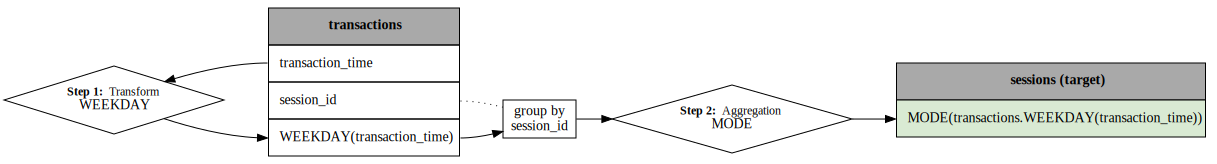

In [48]:
ft.graph_feature(feature)

# Example 2: Titanic

## Usual Data Cleaning and Modeling

In [35]:
ls

featuretool_test1.ipynb  titanic/


In [36]:
titanic_df = pd.read_csv('titanic/train.csv')
test_df= pd.read_csv('titanic/test.csv')

titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [40]:
#titanic_df.iloc[:,:]

In [41]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(titanic_df.iloc[:,:], titanic_df['Survived'], random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.00,0,0,SOTON/OQ 392076,7.0500,NaN,S
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.00,0,2,250649,14.5000,NaN,S
478,479,0,3,"Karlsson, Mr. Nils August",male,22.00,0,0,350060,7.5208,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S


In [54]:
X_train.shape[0]/titanic_df.shape[0]

0.7497194163860831

In [43]:
X_test.shape

(223, 12)

In [47]:
X_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
425,426,0,3,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,NaN,S
101,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S


In [55]:
#mapper = DataFrameMapper([
    
    ## PassengerId   --incldude for Feature Tools
    #('PassengerId', None),
     
    ##pclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
    #('Pclass',[CategoricalImputer(strategy='mode')]),
    #('Name',[CategoricalImputer(strategy='fixed_value',replacement="")]),
    ##Sex    male/female
    #(['Sex'],  [CategoricalImputer(strategy='mode'), OrdinalEncoder()]),
    #(['Age'],[SimpleImputer(strategy='median')]),
    #(['SibSp'],[SimpleImputer(strategy='constant', fill_value=0)]),
    #(['Parch'],[SimpleImputer(strategy='constant', fill_value=0)]),
    ## skipping ticket, fare and cabin for now
    #(['Embarked'],[CategoricalImputer(strategy='mode'), OrdinalEncoder()]) 

#], df_out=True)

In [56]:
X_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            132
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          519
Embarked         2
dtype: int64

In [57]:
X_test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             45
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          168
Embarked         0
dtype: int64

In [58]:
X_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [59]:
genders = {"male": 0, "female": 1}
data = [X_train, X_test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [60]:
X_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
298,299,1,1,"Saalfeld, Mr. Adolphe",0,NaN,0,0,19988,30.5000,C106,S
884,885,0,3,"Sutehall, Mr. Henry Jr",0,25.00,0,0,SOTON/OQ 392076,7.0500,NaN,S
247,248,1,2,"Hamalainen, Mrs. William (Anna)",1,24.00,0,2,250649,14.5000,NaN,S
478,479,0,3,"Karlsson, Mr. Nils August",0,22.00,0,0,350060,7.5208,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",1,21.00,0,0,343120,7.6500,NaN,S
270,271,0,1,"Cairns, Mr. Alexander",0,NaN,0,0,113798,31.0000,NaN,S
860,861,0,3,"Hansen, Mr. Claus Peter",0,41.00,2,0,350026,14.1083,NaN,S
435,436,1,1,"Carter, Miss. Lucile Polk",1,14.00,1,2,113760,120.0000,B96 B98,S


In [62]:
# Embark

common_value = X_train['Embarked'].mode()[0]

data = [X_train, X_test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [63]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoder.fit(X_train['Embarked'])
X_train['Embarked'] = encoder.transform(X_train['Embarked'])
X_test['Embarked'] = encoder.transform(X_test['Embarked'])

In [68]:
# Age

X_train['Age'].fillna(X_train['Age'].median(), inplace = True)
X_test['Age'].fillna(X_train['Age'].median(), inplace = True)

In [73]:
# family_count

X_train['family_count'] = X_train['Parch'] + X_train['SibSp']
X_test['family_count'] = X_test['Parch'] + X_test['SibSp']

In [74]:
X_train[['PassengerId','Pclass','Sex','Age','Embarked','family_count']].isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age             0
Embarked        0
family_count    0
dtype: int64

In [75]:
X_train = X_train[['PassengerId','Pclass','Sex','Age','Embarked','family_count']]
X_test = X_test[['PassengerId','Pclass','Sex','Age','Embarked','family_count']]

In [76]:
X_train_orig =X_train.copy()
X_train.head()

,PassengerId,Pclass,Sex,Age,Embarked,family_count
298,299,1,0,28.00,2,0
884,885,3,0,25.00,2,0
247,248,2,1,24.00,2,2
478,479,3,0,22.00,2,0
305,306,1,0,0.92,2,3


In [77]:
# save a copy of this dataframe for later reference
X_test_orig = X_test.copy()
X_test.head()

,PassengerId,Pclass,Sex,Age,Embarked,family_count
709,710,3,0,28.0,0,2
439,440,2,0,31.0,2,0
840,841,3,0,20.0,2,0
720,721,2,1,6.0,2,1
39,40,3,1,14.0,0,1


In [82]:
titanic_df[titanic_df.PassengerId == 306]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C22 C26,S


In [78]:
def run_classification(trainx, testx):
    classifier =DecisionTreeClassifier(criterion='gini',max_depth=2, max_leaf_nodes=20)
    classifier.fit(trainx, y_train)
    Y_pred = classifier.predict(testx)
    print(f"Decision Tree Test score {classifier.score(testx, y_test)}")
    print(f"Decision Tree Confusion Matrix: \n {confusion_matrix(y_test, Y_pred)}")
#     feature_importances = classifier.feature_importances_
#     feature_importances     

    
    lr=LogisticRegression(solver='lbfgs',max_iter=500)
    lr = lr.fit(trainx, y_train)
    print(f"LogisticRegression Test socre {lr.score(testx, y_test)}")
    Y_pred2 = lr.predict(testx)
    print(f"Logistic Regression Confusion Matix:\n {confusion_matrix(y_test, Y_pred2)}")
    
    
    lr_weights = pd.DataFrame({
        'features': testx.columns,
        'importance': lr.coef_[0]
    }) 
    lr_weights.sort_values('importance', ascending=False, inplace=True)
    print(f"LogisticRegression Top Feature Weights\n {lr_weights.head()}")

In [80]:
run_classification(X_train, X_test)

Decision Tree Test score 0.7757847533632287
Decision Tree Confusion Matrix: 
 [[127   7]
 [ 43  46]]
LogisticRegression Test socre 0.8026905829596412
Logistic Regression Confusion Matix:
 [[114  20]
 [ 24  65]]
LogisticRegression Top Feature Weights
        features  importance
2           Sex    2.602317
0   PassengerId    0.000374
3           Age   -0.032664
5  family_count   -0.176449
4      Embarked   -0.260824


In [86]:
run_classification(X_train.drop('PassengerId',axis=1), X_test.drop('PassengerId',axis=1))

#X_train.drop('PassengerId',axis=1)

Decision Tree Test score 0.7757847533632287
Decision Tree Confusion Matrix: 
 [[127   7]
 [ 43  46]]
LogisticRegression Test socre 0.7982062780269058
Logistic Regression Confusion Matix:
 [[113  21]
 [ 24  65]]
LogisticRegression Top Feature Weights
        features  importance
1           Sex    2.585263
2           Age   -0.032541
4  family_count   -0.176888
3      Embarked   -0.262325
0        Pclass   -1.028508


## Feature Tools

Follow this one:

https://github.com/ag2816/TitanicKaggle/blob/master/Titanic_FeatureTools.ipynb

blog discussion:
https://medium.com/dataexplorations/tool-review-can-featuretools-simplify-the-process-of-feature-engineering-5d165100b0c3

## some tests

In [87]:
# Let's see what Primitives are available out of the box

primitives = ft.list_primitives()
pd.options.display.max_colwidth = 100
primitives[primitives['type'] == 'aggregation'].head(primitives[primitives['type'] == 'aggregation'].shape[0])

,name,type,dask_compatible,koalas_compatible,description,valid_inputs,return_type
0,avg_time_between,aggregation,False,False,Computes the average number of seconds between consecutive events.,DatetimeTimeIndex,Numeric
1,sum,aggregation,True,True,"Calculates the total addition, ignoring `NaN`.",Numeric,Numeric
2,num_true,aggregation,True,False,Counts the number of `True` values.,Boolean,Numeric
3,trend,aggregation,False,False,Calculates the trend of a variable over time.,"DatetimeTimeIndex, Numeric",Numeric
4,max,aggregation,True,True,"Calculates the highest value, ignoring `NaN` values.",Numeric,Numeric
5,time_since_last,aggregation,False,False,Calculates the time elapsed since the last datetime (default in seconds).,DatetimeTimeIndex,Numeric
6,mode,aggregation,False,False,Determines the most commonly repeated value.,Discrete,None
7,any,aggregation,True,False,Determines if any value is 'True' in a list.,Boolean,Boolean
8,count,aggregation,True,True,"Determines the total number of values, excluding `NaN`.",Index,Numeric
9,first,aggregation,False,False,Determines the first value in a list.,Variable,None


In [94]:
#primitives[primitives['type'] == 'transform'].head(57)

primitives[primitives['type'] == 'transform'].head(primitives[primitives['type'] == 'transform'].shape[0])

,name,type,dask_compatible,koalas_compatible,description,valid_inputs,return_type
22,equal_scalar,transform,True,True,Determines if values in a list are equal to a given scalar.,Variable,Boolean
23,is_weekend,transform,True,True,Determines if a date falls on a weekend.,Datetime,Boolean
24,modulo_numeric,transform,True,True,Element-wise modulo of two lists.,Numeric,Numeric
25,cum_count,transform,False,False,Calculates the cumulative count.,"Id, Discrete",Numeric
26,divide_numeric,transform,True,True,Element-wise division of two lists.,Numeric,Numeric
27,less_than_equal_to,transform,True,True,Determines if values in one list are less than or equal to another list.,"Datetime, Ordinal, Numeric",Boolean
28,longitude,transform,False,False,Returns the second tuple value in a list of LatLong tuples.,LatLong,Numeric
29,divide_numeric_scalar,transform,True,True,Divide each element in the list by a scalar.,Numeric,Numeric
30,month,transform,True,True,Determines the month value of a datetime.,Datetime,Ordinal
31,multiply_numeric,transform,True,True,Element-wise multiplication of two lists.,"Boolean, Numeric",Numeric


In [95]:
# creating and entity set 'es'
es = ft.EntitySet(id = 'Survivors')

In [96]:
es

Entityset: Survivors
  Entities:
  Relationships:
    No relationships

In [97]:
# adding a dataframe 
es.entity_from_dataframe(entity_id = 'Passengers', dataframe = X_train, index = 'PassengerId')

Entityset: Survivors
  Entities:
    Passengers [Rows: 668, Columns: 6]
  Relationships:
    No relationships

In [98]:
# check the variables 

es["Passengers"].variables

[<Variable: PassengerId (dtype = index)>,
 <Variable: Pclass (dtype = numeric)>,
 <Variable: Sex (dtype = numeric)>,
 <Variable: Age (dtype = numeric)>,
 <Variable: Embarked (dtype = numeric)>,
 <Variable: family_count (dtype = numeric)>]

In [99]:
# add variable_types

variable_types = { 'PassengerId': vtypes.Categorical,
      'Sex': vtypes.Categorical,
      'Pclass': vtypes.Categorical,
      'Embarked': vtypes.Categorical}

es.entity_from_dataframe(entity_id = 'Passengers', dataframe = X_train, index = 'PassengerId', variable_types=variable_types)

Entityset: Survivors
  Entities:
    Passengers [Rows: 668, Columns: 6]
  Relationships:
    No relationships

In [100]:
es["Passengers"].variables

[<Variable: PassengerId (dtype = index)>,
 <Variable: Age (dtype = numeric)>,
 <Variable: family_count (dtype = numeric)>,
 <Variable: Sex (dtype = categorical)>,
 <Variable: Pclass (dtype = categorical)>,
 <Variable: Embarked (dtype = categorical)>]

In [102]:
es = es.normalize_entity(base_entity_id='Passengers', new_entity_id='Pclass', index='Pclass')
# Let's see what Primitives are available out of the box

es

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/featuretools/entityset/entityset.py:265: UserWarning: Not adding duplicate relationship: <Relationship: Passengers.Pclass -> Pclass.Pclass>
  warnings.warn(


Entityset: Survivors
  Entities:
    Passengers [Rows: 668, Columns: 6]
    Pclass [Rows: 3, Columns: 1]
  Relationships:
    Passengers.Pclass -> Pclass.Pclass

## Go through the module:

In [103]:
X_train_orig.reset_index(drop=True, inplace=True)
X_test_orig.reset_index(drop=True, inplace=True)
X_train_orig.head()

,PassengerId,Pclass,Sex,Age,Embarked,family_count
0,299,1,0,28.00,2,0
1,885,3,0,25.00,2,0
2,248,2,1,24.00,2,2
3,479,3,0,22.00,2,0
4,306,1,0,0.92,2,3


In [104]:
# creating and entity set 'es'
es = ft.EntitySet(id = 'Survivors')
variable_types = { 
      'Sex': vtypes.Categorical,
      'Pclass': vtypes.Categorical,
      'Embarked': vtypes.Categorical}

es.entity_from_dataframe(entity_id = 'Passengers', dataframe = X_train_orig, index = 'Id', variable_types=variable_types)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/featuretools/entityset/entity.py:462: UserWarning: index Id not found in dataframe, creating new integer column
  warnings.warn("index {} not found in dataframe, creating new "


Entityset: Survivors
  Entities:
    Passengers [Rows: 668, Columns: 7]
  Relationships:
    No relationships

In [105]:
es["Passengers"].variables

[<Variable: Id (dtype = index)>,
 <Variable: PassengerId (dtype = numeric)>,
 <Variable: Age (dtype = numeric)>,
 <Variable: family_count (dtype = numeric)>,
 <Variable: Sex (dtype = categorical)>,
 <Variable: Pclass (dtype = categorical)>,
 <Variable: Embarked (dtype = categorical)>]

In [106]:
es = es.normalize_entity(base_entity_id='Passengers', new_entity_id='Pclass', index='Pclass')
es

Entityset: Survivors
  Entities:
    Passengers [Rows: 668, Columns: 7]
    Pclass [Rows: 3, Columns: 1]
  Relationships:
    Passengers.Pclass -> Pclass.Pclass

In [107]:
feature_matrix, feature_names = ft.dfs(entityset=es, 
    target_entity = 'Passengers', 
    max_depth = 2, 
    verbose = 3, 
    n_jobs = 1,
    ignore_variables={'Passengers':['PassengerId']})

Built 22 features
Elapsed: 00:00 | Progress: 100%|██████████


In [108]:
feature_matrix

,Age,family_count,Sex,Pclass,Embarked,Pclass.COUNT(Passengers),Pclass.MAX(Passengers.Age),Pclass.MAX(Passengers.family_count),Pclass.MEAN(Passengers.Age),Pclass.MEAN(Passengers.family_count),Pclass.MIN(Passengers.Age),Pclass.MIN(Passengers.family_count),Pclass.MODE(Passengers.Embarked),Pclass.MODE(Passengers.Sex),Pclass.NUM_UNIQUE(Passengers.Embarked),Pclass.NUM_UNIQUE(Passengers.Sex),Pclass.SKEW(Passengers.Age),Pclass.SKEW(Passengers.family_count),Pclass.STD(Passengers.Age),Pclass.STD(Passengers.family_count),Pclass.SUM(Passengers.Age),Pclass.SUM(Passengers.family_count)
Id,,,,,,,,,,,,,,,,,,,,,,
0,28.00,0,0,1,2,152,80.0,5,36.835000,0.782895,0.92,0,2,0,3,2,0.259387,1.960429,14.234234,1.091313,5598.92,119
1,25.00,0,0,3,2,375,74.0,10,25.789120,1.029333,0.42,0,2,0,3,2,0.211083,2.564656,10.574068,2.037534,9670.92,386
2,24.00,2,1,2,2,141,70.0,5,29.758865,0.808511,0.67,0,2,0,3,2,0.133481,1.234036,13.996094,1.101395,4196.00,114
3,22.00,0,0,3,2,375,74.0,10,25.789120,1.029333,0.42,0,2,0,3,2,0.211083,2.564656,10.574068,2.037534,9670.92,386
4,0.92,3,0,1,2,152,80.0,5,36.835000,0.782895,0.92,0,2,0,3,2,0.259387,1.960429,14.234234,1.091313,5598.92,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,21.00,0,1,3,2,375,74.0,10,25.789120,1.029333,0.42,0,2,0,3,2,0.211083,2.564656,10.574068,2.037534,9670.92,386
664,28.00,0,0,1,2,152,80.0,5,36.835000,0.782895,0.92,0,2,0,3,2,0.259387,1.960429,14.234234,1.091313,5598.92,119
665,41.00,2,0,3,2,375,74.0,10,25.789120,1.029333,0.42,0,2,0,3,2,0.211083,2.564656,10.574068,2.037534,9670.92,386


In [109]:
feature_names

[<Feature: Age>,
 <Feature: family_count>,
 <Feature: Sex>,
 <Feature: Pclass>,
 <Feature: Embarked>,
 <Feature: Pclass.COUNT(Passengers)>,
 <Feature: Pclass.MAX(Passengers.Age)>,
 <Feature: Pclass.MAX(Passengers.family_count)>,
 <Feature: Pclass.MEAN(Passengers.Age)>,
 <Feature: Pclass.MEAN(Passengers.family_count)>,
 <Feature: Pclass.MIN(Passengers.Age)>,
 <Feature: Pclass.MIN(Passengers.family_count)>,
 <Feature: Pclass.MODE(Passengers.Embarked)>,
 <Feature: Pclass.MODE(Passengers.Sex)>,
 <Feature: Pclass.NUM_UNIQUE(Passengers.Embarked)>,
 <Feature: Pclass.NUM_UNIQUE(Passengers.Sex)>,
 <Feature: Pclass.SKEW(Passengers.Age)>,
 <Feature: Pclass.SKEW(Passengers.family_count)>,
 <Feature: Pclass.STD(Passengers.Age)>,
 <Feature: Pclass.STD(Passengers.family_count)>,
 <Feature: Pclass.SUM(Passengers.Age)>,
 <Feature: Pclass.SUM(Passengers.family_count)>]

In [111]:
X_train=feature_matrix.copy()

In [112]:
# Repeat the steps for Encoding our training set

feature_matrix_enc, features_enc = ft.encode_features(feature_matrix, feature_names, include_unknown=False)

In [113]:
feature_matrix_enc.head()

,Age,family_count,Sex = 0,Sex = 1,Pclass = 3,Pclass = 1,Pclass = 2,Embarked = 2,Embarked = 0,Embarked = 1,Pclass.COUNT(Passengers),Pclass.MAX(Passengers.Age),Pclass.MAX(Passengers.family_count),Pclass.MEAN(Passengers.Age),Pclass.MEAN(Passengers.family_count),Pclass.MIN(Passengers.Age),Pclass.MIN(Passengers.family_count),Pclass.MODE(Passengers.Embarked) = 2,Pclass.MODE(Passengers.Sex) = 0,Pclass.NUM_UNIQUE(Passengers.Embarked),Pclass.NUM_UNIQUE(Passengers.Sex),Pclass.SKEW(Passengers.Age),Pclass.SKEW(Passengers.family_count),Pclass.STD(Passengers.Age),Pclass.STD(Passengers.family_count),Pclass.SUM(Passengers.Age),Pclass.SUM(Passengers.family_count)
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,28.00,0,True,False,False,True,False,True,False,False,152,80.0,5,36.835000,0.782895,0.92,0,True,True,3,2,0.259387,1.960429,14.234234,1.091313,5598.92,119
1,25.00,0,True,False,True,False,False,True,False,False,375,74.0,10,25.789120,1.029333,0.42,0,True,True,3,2,0.211083,2.564656,10.574068,2.037534,9670.92,386
2,24.00,2,False,True,False,False,True,True,False,False,141,70.0,5,29.758865,0.808511,0.67,0,True,True,3,2,0.133481,1.234036,13.996094,1.101395,4196.00,114
3,22.00,0,True,False,True,False,False,True,False,False,375,74.0,10,25.789120,1.029333,0.42,0,True,True,3,2,0.211083,2.564656,10.574068,2.037534,9670.92,386
4,0.92,3,True,False,False,True,False,True,False,False,152,80.0,5,36.835000,0.782895,0.92,0,True,True,3,2,0.259387,1.960429,14.234234,1.091313,5598.92,119


In [114]:
X_train = feature_matrix_enc.copy()
X_train.head()

,Age,family_count,Sex = 0,Sex = 1,Pclass = 3,Pclass = 1,Pclass = 2,Embarked = 2,Embarked = 0,Embarked = 1,Pclass.COUNT(Passengers),Pclass.MAX(Passengers.Age),Pclass.MAX(Passengers.family_count),Pclass.MEAN(Passengers.Age),Pclass.MEAN(Passengers.family_count),Pclass.MIN(Passengers.Age),Pclass.MIN(Passengers.family_count),Pclass.MODE(Passengers.Embarked) = 2,Pclass.MODE(Passengers.Sex) = 0,Pclass.NUM_UNIQUE(Passengers.Embarked),Pclass.NUM_UNIQUE(Passengers.Sex),Pclass.SKEW(Passengers.Age),Pclass.SKEW(Passengers.family_count),Pclass.STD(Passengers.Age),Pclass.STD(Passengers.family_count),Pclass.SUM(Passengers.Age),Pclass.SUM(Passengers.family_count)
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,28.00,0,True,False,False,True,False,True,False,False,152,80.0,5,36.835000,0.782895,0.92,0,True,True,3,2,0.259387,1.960429,14.234234,1.091313,5598.92,119
1,25.00,0,True,False,True,False,False,True,False,False,375,74.0,10,25.789120,1.029333,0.42,0,True,True,3,2,0.211083,2.564656,10.574068,2.037534,9670.92,386
2,24.00,2,False,True,False,False,True,True,False,False,141,70.0,5,29.758865,0.808511,0.67,0,True,True,3,2,0.133481,1.234036,13.996094,1.101395,4196.00,114
3,22.00,0,True,False,True,False,False,True,False,False,375,74.0,10,25.789120,1.029333,0.42,0,True,True,3,2,0.211083,2.564656,10.574068,2.037534,9670.92,386
4,0.92,3,True,False,False,True,False,True,False,False,152,80.0,5,36.835000,0.782895,0.92,0,True,True,3,2,0.259387,1.960429,14.234234,1.091313,5598.92,119


### For test data

In [115]:
# For test

# creating and entity set 'es'
es_tst = ft.EntitySet(id = 'Survivors')
# adding a dataframe 
es_tst.entity_from_dataframe(entity_id = 'Passengers', dataframe = X_test_orig, index = 'Id')
# add PCLass entity
es_tst = es_tst.normalize_entity(base_entity_id='Passengers', new_entity_id='Pclass', index='Pclass')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/featuretools/entityset/entity.py:462: UserWarning: index Id not found in dataframe, creating new integer column
  warnings.warn("index {} not found in dataframe, creating new "


In [116]:
es_tst


Entityset: Survivors
  Entities:
    Passengers [Rows: 223, Columns: 7]
    Pclass [Rows: 3, Columns: 1]
  Relationships:
    Passengers.Pclass -> Pclass.Pclass

In [117]:
feature_matrix_tst = ft.calculate_feature_matrix(features=features_enc, entityset=es_tst)

In [118]:
X_test = feature_matrix_tst.copy()
X_test.head()

,Age,family_count,Sex = 0,Sex = 1,Pclass = 3,Pclass = 1,Pclass = 2,Embarked = 2,Embarked = 0,Embarked = 1,Pclass.COUNT(Passengers),Pclass.MAX(Passengers.Age),Pclass.MAX(Passengers.family_count),Pclass.MEAN(Passengers.Age),Pclass.MEAN(Passengers.family_count),Pclass.MIN(Passengers.Age),Pclass.MIN(Passengers.family_count),Pclass.MODE(Passengers.Embarked) = 2,Pclass.MODE(Passengers.Sex) = 0,Pclass.NUM_UNIQUE(Passengers.Embarked),Pclass.NUM_UNIQUE(Passengers.Sex),Pclass.SKEW(Passengers.Age),Pclass.SKEW(Passengers.family_count),Pclass.STD(Passengers.Age),Pclass.STD(Passengers.family_count),Pclass.SUM(Passengers.Age),Pclass.SUM(Passengers.family_count)
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,28.0,2,True,False,True,False,False,False,True,False,116,65.0,6,26.396552,0.939655,2.00,0,True,True,3,2,0.690926,1.852647,11.122151,1.659171,3062.00,109
1,31.0,0,True,False,False,False,True,True,False,False,43,66.0,3,29.786744,0.697674,0.83,0,True,False,2,2,0.315440,0.864271,12.275540,0.887342,1280.83,30
2,20.0,0,True,False,True,False,False,True,False,False,116,65.0,6,26.396552,0.939655,2.00,0,True,True,3,2,0.690926,1.852647,11.122151,1.659171,3062.00,109
3,6.0,1,False,True,False,False,True,True,False,False,43,66.0,3,29.786744,0.697674,0.83,0,True,False,2,2,0.315440,0.864271,12.275540,0.887342,1280.83,30
4,14.0,1,False,True,True,False,False,False,True,False,116,65.0,6,26.396552,0.939655,2.00,0,True,True,3,2,0.690926,1.852647,11.122151,1.659171,3062.00,109


In [119]:
X_train.shape, X_test.shape

((668, 27), (223, 27))

In [120]:
# Remove any null values

# double check for nulls
for col in X_train.columns:
    if X_train[col].isnull().sum() >0:
        print(col)
        X_train.drop(col, axis=1, inplace=True)

### Try Classification Model

In [122]:
run_classification(X_train, X_test)

Decision Tree Test score 0.7802690582959642
Decision Tree Confusion Matrix: 
 [[110  24]
 [ 25  64]]
LogisticRegression Test socre 0.7847533632286996
Logistic Regression Confusion Matix:
 [[113  21]
 [ 27  62]]
LogisticRegression Top Feature Weights
                        features  importance
3                       Sex = 1    1.324088
8                  Embarked = 0    0.211836
9                  Embarked = 1    0.110087
11   Pclass.MAX(Passengers.Age)    0.017117
13  Pclass.MEAN(Passengers.Age)    0.007583


##  remove any highly correlated features

In [123]:
# Threshold for removing correlated variables
threshold = 0.7

# Absolute value correlation matrix
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Select columns with correlations above threshold
collinear_features = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d features to remove.' % (len(collinear_features)))

There are 14 features to remove.


<ipython-input-123-aadf667e4a66>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [124]:
X_train_flt = X_train.drop(columns = collinear_features)
X_test_flt = X_test.drop(columns = collinear_features)
X_train_flt.shape, X_test_flt.shape

((668, 13), (223, 13))

In [125]:
X_train_flt

,Age,family_count,Sex = 0,Pclass = 3,Pclass = 1,Pclass = 2,Embarked = 2,Embarked = 1,Pclass.MIN(Passengers.family_count),Pclass.MODE(Passengers.Embarked) = 2,Pclass.MODE(Passengers.Sex) = 0,Pclass.NUM_UNIQUE(Passengers.Embarked),Pclass.NUM_UNIQUE(Passengers.Sex)
Id,,,,,,,,,,,,,
0,28.00,0,True,False,True,False,True,False,0,True,True,3,2
1,25.00,0,True,True,False,False,True,False,0,True,True,3,2
2,24.00,2,False,False,False,True,True,False,0,True,True,3,2
3,22.00,0,True,True,False,False,True,False,0,True,True,3,2
4,0.92,3,True,False,True,False,True,False,0,True,True,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,21.00,0,False,True,False,False,True,False,0,True,True,3,2
664,28.00,0,True,False,True,False,True,False,0,True,True,3,2
665,41.00,2,True,True,False,False,True,False,0,True,True,3,2


In [126]:
run_classification(X_train_flt, X_test_flt)

Decision Tree Test score 0.7757847533632287
Decision Tree Confusion Matrix: 
 [[127   7]
 [ 43  46]]
LogisticRegression Test socre 0.8026905829596412
Logistic Regression Confusion Matix:
 [[115  19]
 [ 25  64]]
LogisticRegression Top Feature Weights
                                   features  importance
4                               Pclass = 1    0.879083
5                               Pclass = 2    0.213598
11  Pclass.NUM_UNIQUE(Passengers.Embarked)    0.003000
12       Pclass.NUM_UNIQUE(Passengers.Sex)    0.002000
9     Pclass.MODE(Passengers.Embarked) = 2    0.001000


### Visualize Decision Tree Feature Importance

In [127]:
classifier =DecisionTreeClassifier(criterion='gini',max_depth=2, max_leaf_nodes=20)
classifier.fit(X_train_flt, y_train)

feature_importances = classifier.feature_importances_
pd.DataFrame({
    'features': X_train_flt.columns,
    'importance': feature_importances
})

,features,importance
0,Age,0.093831
1,family_count,0.000000
2,Sex = 0,0.710539
3,Pclass = 3,0.195631
4,Pclass = 1,0.000000
5,Pclass = 2,0.000000
6,Embarked = 2,0.000000
7,Embarked = 1,0.000000
8,Pclass.MIN(Passengers.family_count),0.000000
9,Pclass.MODE(Passengers.Embarked) = 2,0.000000


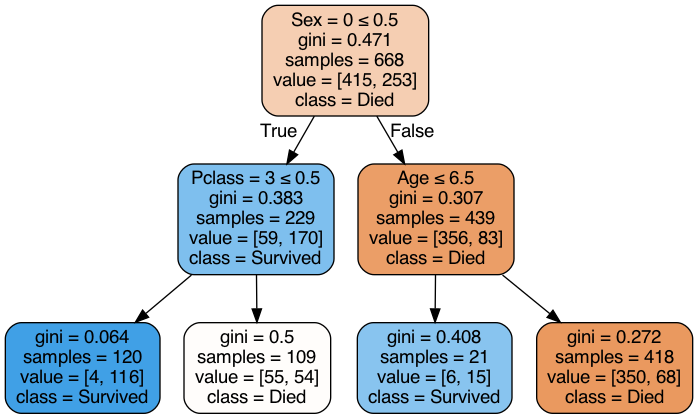

In [134]:
# Use graphviz to make a chart of the regression tree decision points:
from six import StringIO
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()  

export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                 feature_names=X_train_flt.columns,
        class_names=["Died", "Survived"])  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Notes

- First, split the training data and reset index
- Then set up the entity, also set up variable types
- normalize entity, or do the relationships
- encode_features (similar to dummies the features)
- Do similar steps for test data
- Remove highly correlated features
- Run the model